<a href="https://colab.research.google.com/github/istiqb/Sentiment_Analysis/blob/main/LSTM_IS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Long Short Term Memory
oleh:
1. Istiqamatul Badriah (G1A017013)
2. Sefti Wulandari (G1A017016)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"istiqb","key":"cda471f879ffd4bacec2ff8a125ada03"}'}

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_datasets as tfds

In [8]:
!kaggle datasets download -d jessemostipak/animal-crossing

  0% 0.00/754k [00:00<?, ?B/s]
100% 754k/754k [00:00<00:00, 50.8MB/s]


In [9]:
from zipfile import ZipFile
file_name = "animal-crossing.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()

In [10]:
import pandas as pd
data = pd.read_csv('user_reviews.csv')
data.head()

,grade,user_name,text,date
0,4,mds27272,My gf started playing before me. No option to ...,2020-03-20
1,5,lolo2178,"While the game itself is great, really relaxin...",2020-03-20
2,0,Roachant,My wife and I were looking forward to playing ...,2020-03-20
3,0,Houndf,We need equal values and opportunities for all...,2020-03-20
4,0,ProfessorFox,BEWARE! If you have multiple people in your h...,2020-03-20


In [14]:
data=data[data.grade != 3]

pd.set_option('mode.chained_assignment', None)
data["labels"] = data["grade"].apply(lambda x: 1 if x < 3  else 0) # positive as 0 and negative as 1
data = data.drop("grade",axis=1)

data.head()

,user_name,text,date,labels
0,mds27272,My gf started playing before me. No option to ...,2020-03-20,0
1,lolo2178,"While the game itself is great, really relaxin...",2020-03-20,0
2,Roachant,My wife and I were looking forward to playing ...,2020-03-20,1
3,Houndf,We need equal values and opportunities for all...,2020-03-20,1
4,ProfessorFox,BEWARE! If you have multiple people in your h...,2020-03-20,1


Positive reviews are 0 and negative reviews are 1 of total 2901 


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


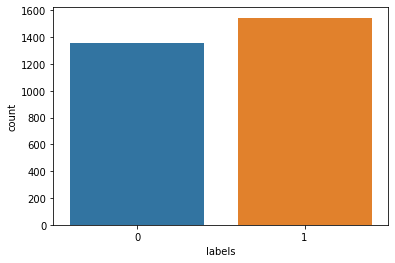

In [15]:
negative = len(data[data['labels']=='0'])
positive = len(data) - 1
sns.countplot(data['labels'])
print('Positive reviews are {} and negative reviews are {} of total {} '.format(0,1,len(data)))

In [18]:
le = LabelEncoder()
training_reviews,testing_reviews,training_labels,testing_labels  = train_test_split(data['text'].values,data['labels'].values,test_size = 0.2)
training_labels = le.fit_transform(training_labels)
testing_labels = le.fit_transform(testing_labels)

In [19]:
tokenizer = Tokenizer(num_words=10000,oov_token='<OOV>')
tokenizer.fit_on_texts(training_reviews)
word_index = tokenizer.word_index
training_sequence = tokenizer.texts_to_sequences(training_reviews)
testing_sequence = tokenizer.texts_to_sequences(testing_reviews)
train_pad_sequence = pad_sequences(training_sequence,maxlen = 200,truncating= 'post',padding = 'pre')
test_pad_sequence = pad_sequences(testing_sequence,maxlen = 200,truncating= 'post',padding = 'pre')
print('Total Unique Words : {}'.format(len(word_index)))

Total Unique Words : 10912


In [21]:
embedding_matrix = np.zeros((len(word_index) + 1,200))
for word, i in word_index.items():
    embedding_vector = embedded_words.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [22]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(len(word_index) + 1,200,weights=[embedding_matrix],input_length=200,
                            trainable=False),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(256,activation = 'relu',),
                             tf.keras.layers.Dense(128,activation = 'relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(1,activation = tf.nn.sigmoid)])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 200)          2182600   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               135680    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               33024     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

In [24]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy() , optimizer='Adam' , metrics = 'accuracy')
history = model.fit(train_pad_sequence,training_labels,epochs = 30 ,validation_data=(test_pad_sequence,testing_labels))

Epoch 1/30
73/73 [==============================] - 19s 212ms/step - loss: 0.6929 - accuracy: 0.5292 - val_loss: 0.6927 - val_accuracy: 0.5198
Epoch 2/30
73/73 [==============================] - 14s 197ms/step - loss: 0.6921 - accuracy: 0.5361 - val_loss: 0.6925 - val_accuracy: 0.5198
Epoch 3/30
73/73 [==============================] - 15s 200ms/step - loss: 0.6911 - accuracy: 0.5436 - val_loss: 0.6924 - val_accuracy: 0.5198
Epoch 4/30
73/73 [==============================] - 14s 195ms/step - loss: 0.6885 - accuracy: 0.5719 - val_loss: 0.6924 - val_accuracy: 0.5198
Epoch 5/30
73/73 [==============================] - 15s 199ms/step - loss: 0.6902 - accuracy: 0.5450 - val_loss: 0.6924 - val_accuracy: 0.5198
Epoch 6/30
73/73 [==============================] - 15s 200ms/step - loss: 0.6908 - accuracy: 0.5369 - val_loss: 0.6924 - val_accuracy: 0.5198
Epoch 7/30
73/73 [==============================] - 15s 203ms/step - loss: 0.6922 - accuracy: 0.5222 - val_loss: 0.6925 - val_accuracy: 0.5198

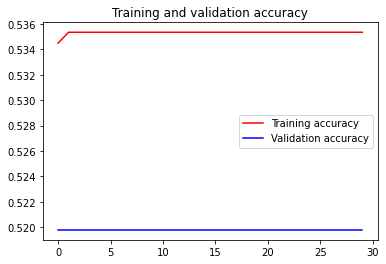

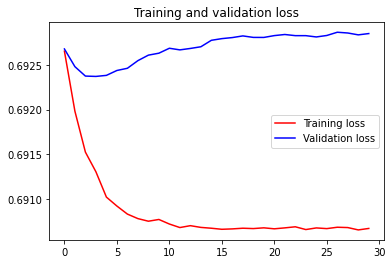

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()

In [26]:
print('Training Accuracy: {}'.format(max(acc)))
print('Validation Accuracy: {}'.format(max(val_acc)))

Training Accuracy: 0.5353448390960693
Validation Accuracy: 0.5197934508323669
